## 4) Data

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [119]:
poker=pd.read_csv('highroller.csv')


🔹 Number of Observations: 11472
🔹 Number of Variables: 20

🔹 Continuous Variables: ['Year', 'PlayerID', 'TourID', 'EventID', 'Event_Code', 'Buy_In', 'Total_Entries', 'Counted_Entries', 'Entries/Indivdual', 'Buy_In_Est_Rebuys', 'Cashed', 'Won', 'Points', 'Place', 'PGT_Point', 'Amount_Won', 'Net']
🔹 Categorical Variables: ['Host', 'Location', 'Game']

🔹 Missing Values in Each Column:
Series([], dtype: int64)

🔹 Correlation Matrix (Numerical Variables):
                       Year  PlayerID    TourID   EventID  Event_Code  \
Year               1.000000  0.441759  0.949345  0.910282    0.949279   
PlayerID           0.441759  1.000000  0.460837  0.450592    0.460849   
TourID             0.949345  0.460837  1.000000  0.972307    0.999999   
EventID            0.910282  0.450592  0.972307  1.000000    0.972587   
Event_Code         0.949279  0.460849  0.999999  0.972587    1.000000   
Buy_In            -0.428881 -0.220356 -0.313999 -0.281435   -0.313876   
Total_Entries      0.339320  0.31

C:\Users\yaboy\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


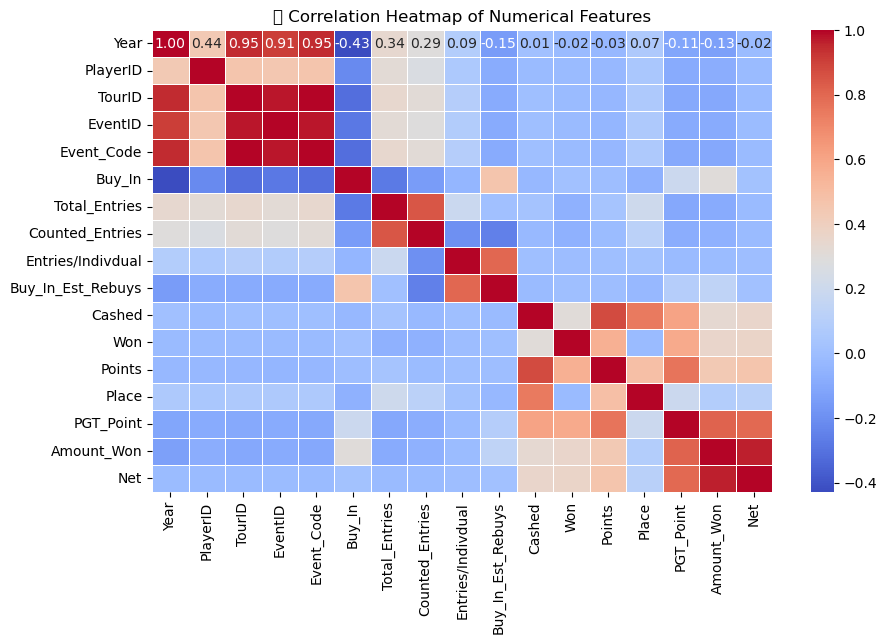

In [120]:
num_rows, num_cols = poker.shape
print(f"\n🔹 Number of Observations: {num_rows}")
print(f"🔹 Number of Variables: {num_cols}")

continuous_vars = poker.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_vars = poker.select_dtypes(include=['object']).columns.tolist()
print(f"\n🔹 Continuous Variables: {continuous_vars}")
print(f"🔹 Categorical Variables: {categorical_vars}")

missing_values = poker.isnull().sum()
print("\n🔹 Missing Values in Each Column:")
print(missing_values[missing_values > 0])  

print("\n🔹 Correlation Matrix (Numerical Variables):")
corr_matrix = poker[continuous_vars].corr()
print(corr_matrix)

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("🔹 Correlation Heatmap of Numerical Features")
plt.show()

## 5) Prediction

In [121]:
poker.columns = poker.columns.str.replace('Entries/Indivdual', 'Entries/Individual')
poker.head()

,Year,PlayerID,TourID,EventID,Event_Code,Host,Location,Game,Buy_In,Total_Entries,Counted_Entries,Entries/Individual,Buy_In_Est_Rebuys,Cashed,Won,Points,Place,PGT_Point,Amount_Won,Net
0,2015,1241,124,235,124235,PokerGo Studios,"Las Vegas, NV",NLH,500000,43,43,1.0,500000,1,1,439,1,900,7525000,7025000
1,2015,1240,124,235,124235,PokerGo Studios,"Las Vegas, NV",NLH,500000,43,43,1.0,500000,1,0,311,2,800,5160000,4660000
2,2015,1239,124,235,124235,PokerGo Studios,"Las Vegas, NV",NLH,500000,43,43,1.0,500000,1,0,254,3,600,3225000,2725000
3,2015,1238,124,235,124235,PokerGo Studios,"Las Vegas, NV",NLH,500000,43,43,1.0,500000,1,0,220,4,500,2150000,1650000
4,2015,1237,124,235,124235,PokerGo Studios,"Las Vegas, NV",NLH,500000,43,43,1.0,500000,1,0,196,5,450,1505000,1005000


In [122]:
# splitting the data set into train and test
from sklearn.model_selection import train_test_split

data = poker

data_encoded = pd.get_dummies(data, columns=['Game'], drop_first=True) # cat variable

y = data_encoded['Net']
X = data_encoded[['Buy_In', 'Total_Entries', 'Entries/Individual', 'Buy_In_Est_Rebuys'] + [col for col in data_encoded if col.startswith('Game_')]]

# The outputs are the training and the test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [123]:
# results df 
results = pd.DataFrame(columns=['Predictor', 'Train RMSE', 'Test RMSE'])

In [124]:
# starting with one predictor
# starting with 'Game' because type of game can have a significant impact on the overall structure and payouts of the tournament, which in turn directly influences the net earnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

model = LinearRegression()
model.fit(X_train.drop(columns=['Buy_In', 'Total_Entries', 'Entries/Individual', 'Buy_In_Est_Rebuys']), y_train) # model for 'game' only

# training and test performance
y_pred_train = model.predict(X_train.drop(columns=['Buy_In', 'Total_Entries', 'Entries/Individual', 'Buy_In_Est_Rebuys']))
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train, squared=False))
print('train RMSE:', train_rmse)

y_pred = model.predict(X_test.drop(columns=['Buy_In', 'Total_Entries', 'Entries/Individual', 'Buy_In_Est_Rebuys']))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred, squared=False))
print('test RMSE:', test_rmse)

train_r2 = model.score(X_train.drop(columns=['Buy_In', 'Total_Entries', 'Entries/Individual', 'Buy_In_Est_Rebuys']), y_train)
test_r2 = model.score(X_test.drop(columns=['Buy_In', 'Total_Entries', 'Entries/Individual', 'Buy_In_Est_Rebuys']), y_test)

print("Train R²:", train_r2)
print("Test R²:", test_r2)

new_row = pd.DataFrame({
    'Predictor': ['Game'], 
    'Train RMSE': [train_rmse], 
    'Test RMSE': [test_rmse],
    'Train R^2': [train_r2],
    'Test R^2': [test_r2],

})

results = pd.concat([results, new_row], ignore_index=True)

results

train RMSE: 448.7761510168514
test RMSE: 417.6321018355383
Train R²: 0.0006511913880895559
Test R²: -0.0011906306282927215


C:\Users\yaboy\AppData\Local\Temp\ipykernel_29548\3617306515.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)


,Predictor,Train RMSE,Test RMSE,Train R^2,Test R^2
0,Game,448.776151,417.632102,0.000651,-0.001191


In [125]:
# second predictor - Buy_In

model.fit(X_train.drop(columns=['Total_Entries', 'Entries/Individual', 'Buy_In_Est_Rebuys']), y_train) # model for 'game' only

# training and test performance
y_pred_train = model.predict(X_train.drop(columns=['Total_Entries', 'Entries/Individual', 'Buy_In_Est_Rebuys']))
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train, squared=False))
print('train RMSE:', train_rmse)

y_pred = model.predict(X_test.drop(columns=['Total_Entries', 'Entries/Individual', 'Buy_In_Est_Rebuys']))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred, squared=False))
print('test RMSE:', test_rmse)

train_r2 = model.score(X_train.drop(columns=['Total_Entries', 'Entries/Individual', 'Buy_In_Est_Rebuys']), y_train)
test_r2 = model.score(X_test.drop(columns=['Total_Entries', 'Entries/Individual', 'Buy_In_Est_Rebuys']), y_test)

print("Train R²:", train_r2)
print("Test R²:", test_r2)

new_row = pd.DataFrame({
    'Predictor': ['Game, Buy-In'], 
    'Train RMSE': [train_rmse], 
    'Test RMSE': [test_rmse],
    'Train R^2': [train_r2],
    'Test R^2': [test_r2],

})

results = pd.concat([results, new_row], ignore_index=True)

results

train RMSE: 448.6343587214331
test RMSE: 418.23798555676876
Train R²: 0.0019135830679442023
Test R²: -0.00701323321654912


,Predictor,Train RMSE,Test RMSE,Train R^2,Test R^2
0,Game,448.776151,417.632102,0.000651,-0.001191
1,"Game, Buy-In",448.634359,418.237986,0.001914,-0.007013


In [126]:
# third predictor - Total_Entries

model.fit(X_train.drop(columns=['Entries/Individual', 'Buy_In_Est_Rebuys']), y_train) # model for 'game' only

# training and test performance
y_pred_train = model.predict(X_train.drop(columns=['Entries/Individual', 'Buy_In_Est_Rebuys']))
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train, squared=False))
print('train RMSE:', train_rmse)

y_pred = model.predict(X_test.drop(columns=['Entries/Individual', 'Buy_In_Est_Rebuys']))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred, squared=False))
print('test RMSE:', test_rmse)

train_r2 = model.score(X_train.drop(columns=['Entries/Individual', 'Buy_In_Est_Rebuys']), y_train)
test_r2 = model.score(X_test.drop(columns=['Entries/Individual', 'Buy_In_Est_Rebuys']), y_test)

print("Train R²:", train_r2)
print("Test R²:", test_r2)

new_row = pd.DataFrame({
    'Predictor': ['Game, Buy-In, Total Entries'], 
    'Train RMSE': [train_rmse], 
    'Test RMSE': [test_rmse],
    'Train R^2': [train_r2],
    'Test R^2': [test_r2],

})
results = pd.concat([results, new_row], ignore_index=True)

results

train RMSE: 448.62291119063366
test RMSE: 418.198985094549
Train R²: 0.00201544943169929
Test R²: -0.006637672030443076


,Predictor,Train RMSE,Test RMSE,Train R^2,Test R^2
0,Game,448.776151,417.632102,0.000651,-0.001191
1,"Game, Buy-In",448.634359,418.237986,0.001914,-0.007013
2,"Game, Buy-In, Total Entries",448.622911,418.198985,0.002015,-0.006638


In [127]:
# fourth predictor - Entries/Individual

model.fit(X_train.drop(columns=['Buy_In_Est_Rebuys']), y_train) # model for 'game' only

# training and test performance
y_pred_train = model.predict(X_train.drop(columns=['Buy_In_Est_Rebuys']))
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train, squared=False))
print('train RMSE:', train_rmse)

y_pred = model.predict(X_test.drop(columns=['Buy_In_Est_Rebuys']))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred, squared=False))
print('test RMSE:', test_rmse)

new_row = pd.DataFrame({
    'Predictor': ['Entries/Individual, Total_Entries, Game, Buy_In'], 
    'Train RMSE': [train_rmse], 
    'Test RMSE': [test_rmse]
})
train_r2 = model.score(X_train.drop(columns=['Buy_In_Est_Rebuys']), y_train)
test_r2 = model.score(X_test.drop(columns=['Buy_In_Est_Rebuys']), y_test)

print("Train R²:", train_r2)
print("Test R²:", test_r2)

new_row = pd.DataFrame({
    'Predictor':['Game, Buy-In, Total Entries, Entries/Individual'], 
    'Train RMSE': [train_rmse], 
    'Test RMSE': [test_rmse],
    'Train R^2': [train_r2],
    'Test R^2': [test_r2],

})
results = pd.concat([results, new_row], ignore_index=True)

results

train RMSE: 448.62290753132925
test RMSE: 418.1989460776577
Train R²: 0.002015481992936441
Test R²: -0.006637296363656953


,Predictor,Train RMSE,Test RMSE,Train R^2,Test R^2
0,Game,448.776151,417.632102,0.000651,-0.001191
1,"Game, Buy-In",448.634359,418.237986,0.001914,-0.007013
2,"Game, Buy-In, Total Entries",448.622911,418.198985,0.002015,-0.006638
3,"Game, Buy-In, Total Entries, Entries/Individual",448.622908,418.198946,0.002015,-0.006637


In [128]:
# fifth predictor - 'Buy_In_Est_Rebuys'

model.fit(X_train, y_train) # model for 'game' only

# training and test performance
y_pred_train = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train, squared=False))
print('train RMSE:', train_rmse)

y_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred, squared=False))
print('test RMSE:', test_rmse)

new_row = pd.DataFrame({
    'Predictor': ['Buy_In_Est_Rebuys, Entries/Individual, Total_Entries, Game, Buy_In'], 
    'Train RMSE': [train_rmse], 
    'Test RMSE': [test_rmse]
})

train_r2 = model.score(X_train, y_train)
test_r2 = model.score(X_test, y_test)

print("Train R²:", train_r2)
print("Test R²:", test_r2)

new_row = pd.DataFrame({
    'Predictor': ['Game, Buy-In, Total Entries, Entries/Individua, Buy_In_Est_Rebuys'], 
    'Train RMSE': [train_rmse], 
    'Test RMSE': [test_rmse],
    'Train R^2': [train_r2],
    'Test R^2': [test_r2],

})

results = pd.concat([results, new_row], ignore_index=True)

results

train RMSE: 448.60266412990893
test RMSE: 418.1908995800344
Train R²: 0.0021955997131459792
Test R²: -0.00655982442434877


,Predictor,Train RMSE,Test RMSE,Train R^2,Test R^2
0,Game,448.776151,417.632102,0.000651,-0.001191
1,"Game, Buy-In",448.634359,418.237986,0.001914,-0.007013
2,"Game, Buy-In, Total Entries",448.622911,418.198985,0.002015,-0.006638
3,"Game, Buy-In, Total Entries, Entries/Individual",448.622908,418.198946,0.002015,-0.006637
4,"Game, Buy-In, Total Entries, Entries/Individua...",448.602664,418.190900,0.002196,-0.006560


Ridge regularization - I am using this because the 'Game' variable is categorical and there will be many irrelevant interaction terms that should be zeroed. 

In [129]:
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.linear_model import Ridge, Lasso, LogisticRegression # NOT the CV objects, models themselves
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, recall_score

poly = PolynomialFeatures(2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)  # Use transform, not fit_transform
poly_feature_names = poly.get_feature_names_out(X_train.columns)
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

# Adjusted alpha range to prevent extreme regularization
alphas = np.logspace(2, -2, 50)  

# Store cross-validation scores
cv_scores = []

# Ridge regression with cross-validation
for alpha in alphas:
    model = Ridge(alpha=alpha)  
    cv_score = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_root_mean_squared_error')
    cv_scores.append(cv_score)

In [130]:
avg_cv_results = -np.array(cv_scores).mean(axis=1)

# First, let's find the best score: lowest RMSE
print('Best avg CV performance:',np.min(avg_cv_results))
print('Best hyperparam:', alphas[np.argmin(avg_cv_results)])

Best avg CV performance: 199106.8886382402
Best hyperparam: 100.0


In [131]:
tuned_alpha = alphas[np.argmin(avg_cv_results)]

# Create the TUNED model and train it
tuned_model = Ridge(alpha = tuned_alpha)

tuned_model.fit(X_train_scaled, y_train)

# get coeffs out
feature_names = poly.get_feature_names_out()
coefficients = tuned_model.coef_
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
zero_coef_features = coef_df[coef_df['Coefficient'] == 0]
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)
top_5 = coef_df.head(5)
bottom_5 = coef_df.tail(5)
important_features = pd.concat([top_5, bottom_5, zero_coef_features])
important_features = important_features.drop(columns=['Abs_Coefficient'])
print(important_features.to_string(index=False))

y_pred = tuned_model.predict(X_test_scaled)
y_pred_train = tuned_model.predict(X_train_scaled)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train, squared=False))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred, squared=False))
print('train RMSE:', train_rmse)
print('test RMSE:', test_rmse)

train_r2 = tuned_model.score(X_train_scaled, y_train)
test_r2 = tuned_model.score(X_test_scaled, y_test)
print("Train R²:", train_r2)
print("Test R²:", test_r2)

                                            Feature   Coefficient
                                           Buy_In^2 -19039.029246
                        Entries/Individual Game_NLH -17707.845778
                           Buy_In Buy_In_Est_Rebuys  15092.624956
                                  Buy_In_Est_Rebuys  14280.970589
                          Buy_In Entries/Individual  14268.153245
                         Game_Heads Up NLH Game_NLH      0.000000
                  Game_Heads Up NLH Game_Online NLH      0.000000
                  Game_Heads Up NLH Game_Online PLO      0.000000
                         Game_Heads Up NLH Game_PLO      0.000000
                      Game_Eight Game Game_Ten Game      0.000000
               Game_Big Bet Mix Game_Dealers Choice      0.000000
                   Game_Big Bet Mix Game_Eight Game      0.000000
                        Game_Big Bet Mix Game_HORSE      0.000000
                 Game_Big Bet Mix Game_Heads Up NLH      0.000000
          

## 6) Inference

In [132]:
# Model summary
feature_names = poly.get_feature_names_out()  # Polynomial feature names
coefficients = tuned_model.coef_  # Coefficients of the polynomial features
original_predictors = ['Buy-In', 'Total_Entries', 'Entries_Individual', 'Buy_In_Est_Rebuys']
game_columns = [col for col in X_train.columns if col.startswith('Game')]

all_feature_names = original_predictors + game_columns + list(feature_names)
all_coefficients = list(tuned_model.coef_[:len(original_predictors) + len(game_columns)]) + list(coefficients)

coef_df = pd.DataFrame({'Feature': all_feature_names, 'Coefficient': all_coefficients})

coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()

coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

top_5 = coef_df[~coef_df['Feature'].isin(original_predictors)].head(5)

top_5_original = coef_df[coef_df['Feature'].isin(original_predictors)].head(5)

top_game_category = coef_df[coef_df['Feature'].isin(game_columns)].head(1)

important_features = pd.concat([top_5_original, top_game_category, top_5])

important_features = important_features.drop(columns=['Abs_Coefficient'])
important_features = important_features.iloc[1:]
print(important_features.to_string(index=False))

                    Feature   Coefficient
          Buy_In_Est_Rebuys  14280.970589
                     Buy-In  -5681.596001
         Entries_Individual  -2901.067470
              Total_Entries   -440.288851
                   Game_NLH    897.731129
                   Buy_In^2 -19039.029246
Entries/Individual Game_NLH -17707.845778
   Buy_In Buy_In_Est_Rebuys  15092.624956
  Buy_In Entries/Individual  14268.153245
 Buy_In_Est_Rebuys Game_NLH  11014.627055


In [133]:
import statsmodels.formula.api as smf
# linear model to get p-values
X_train_poly_df = pd.DataFrame(X_train_poly, columns=poly_feature_names)
# removing special characters
X_train_poly_df.columns = X_train_poly_df.columns.str.replace(r'[^a-zA-Z0-9]', '_', regex=True)

train_df = pd.DataFrame(X_train_poly_df)
train_df['Net'] = y_train 

trained_model = smf.ols(formula='Net ~ ' + ' + '.join(X_train_poly_df.columns), data=train_df).fit()

important_features_cleaned = important_features.copy()
important_features_cleaned['Feature'] = important_features_cleaned['Feature'].str.replace(r'[^a-zA-Z0-9]', '_', regex=True)
important_features_pvalues = trained_model.pvalues[important_features_cleaned['Feature']].dropna().sort_values(ascending=True)
print('p_values:', important_features_pvalues)

p_values: Buy_In_2                       0.538173
Buy_In_Buy_In_Est_Rebuys       0.550646
Buy_In_Est_Rebuys              0.604785
Buy_In_Est_Rebuys_Game_NLH     0.608729
Entries_Individual             0.608896
Buy_In                         0.609275
Entries_Individual_Game_NLH    0.609626
Total_Entries                  0.723410
Buy_In_Entries_Individual      0.960628
Game_NLH                       0.972677
dtype: float64


In [134]:
train_r2 = tuned_model.score(X_train_scaled, y_train)
test_r2 = tuned_model.score(X_test_scaled, y_test)

print("Train R²:", train_r2)
print("Test R²:", test_r2)

Train R²: 0.0040594518446089856
Test R²: -0.005008466394769595
